<a href="https://colab.research.google.com/github/Riyabelle25/PlanetaryAlbedoMapping-Tasks/blob/main/Evaluation_Test_MLMAPPER_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1:**


---


## Predicting the Lunar Albedo based on Chemical Composition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

In [ ]:
# Reading maps from csv and storing as np.arrays
LPFe_Map = pd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPFe_Map.csv').to_numpy()
Albedo_Map=pd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/Albedo_Map.csv').to_numpy()
LPK_Map = pd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPK_Map.csv').to_numpy()
LPTh_Map = pd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPTh_Map.csv').to_numpy()
LPTi_Map = pd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPTi_Map.csv').to_numpy()

'''
Features: List of np.arrays of given maps
Label: np.array of given Albedo Map
'''

Features= [LPFe_Map,LPK_Map,LPTh_Map,LPTi_Map]
Label= Albedo_Map

Albedo_Map


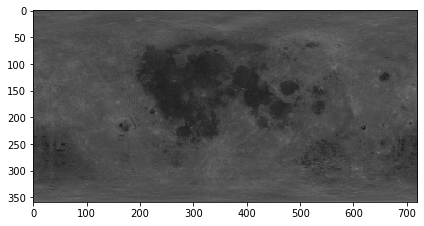

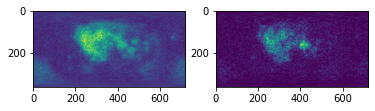

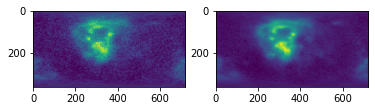

In [ ]:
# Reproducing the maps for verification's sake:
imshow(Albedo_Map)
print("Albedo_Map")
fig, ax = plt.subplots(1,2)
ax[0].imshow(LPFe_Map)
ax[1].imshow(LPTi_Map)
fig, ax1 = plt.subplots(1,2)
ax1[0].imshow(LPK_Map)
ax1[1].imshow(LPTh_Map)


AxesImage(10.8,27.8;410.4x245.703)


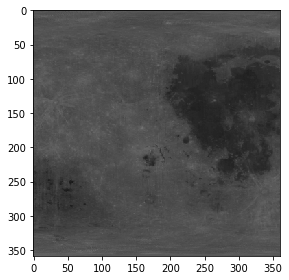

In [ ]:
# Taking left half of the maps for training
print(imshow(Label[:,:360]))
Label[:,:360].shape

In [ ]:
'''
Using left half of the maps for training and right half for testing, as shown in previous cell.

X_train, X_test: 
            np.arrays of 4 features flattened and stacked to give shape of (359x360, 4)
y_train, y_test: 
            np.arrays of Albedo Map, flattened to give shape of (359x360, 1) 

'''
X_train=np.stack((LPFe_Map[:,:360].flatten(),LPK_Map[:,:360].flatten(),LPTh_Map[:,:360].flatten(),LPTi_Map[:,:360].flatten())).T
X_test=np.stack((LPFe_Map[:,360:].flatten(),LPK_Map[:,360:].flatten(),LPTh_Map[:,360:].flatten(),LPTi_Map[:,360:].flatten())).T
print(X_train.shape,X_test.shape)
y_train=np.array(Label[:,:360].flatten()).T
y_test=np.array(Label[:,360:].flatten()).T
print(y_train.shape,y_test.shape)

(129240, 4) (129240, 4)
(129240,) (129240,)


## Seeing the data, I feel **Sklearn's Ensemble Methods** would best suit the Regression Task at hand:


---



---



In [ ]:
'''
Fitting,Prediction and applying Metric: 
          Using sklearn's Ensemble methods: The GradientBoostingRegressor model      
          Using Mean Square Error as the metric for this task.
'''
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42, loss='ls').fit(X_train, y_train)
y_pred=est.predict(X_test)

# printing MSE
mse=mean_squared_error(y_test, y_pred)
print("MSE for GradientBoostingRegressor", mse)


MSE for GradientBoostingRegressor 0.0009403662280276237


## Plotting **Residuals** Plot for the **GBR Model**:

0.5826427033023672

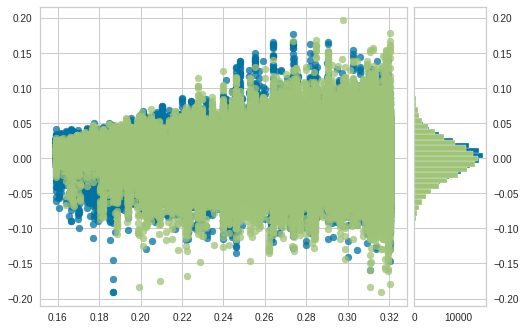

In [ ]:
from yellowbrick.regressor import ResidualsPlot
model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42, loss='ls')
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

AxesImage(36.8,10.8;384.03x266.4)
Predicted Albedo


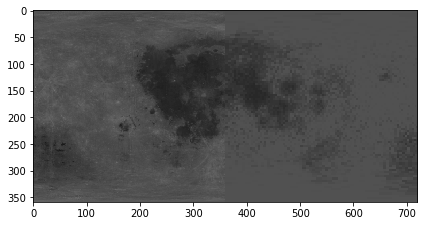

In [ ]:
# Seeing the entire predicted Albedo map :
print(imshow(np.concatenate((Label[:,:360],y_pred_plot), axis=1)))
print("Predicted Albedo")

AxesImage(36.8,10.8;384.03x266.4)
Original albedo


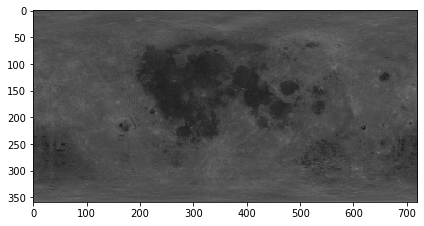

In [ ]:
# Compare with Original Albedo:
print(imshow(Label))
print("Original albedo")

## As you can see, the **GradientBoostingRegressor** from the Ensemble Methods returned the best results (as evident from the **residuals**, along with low MSE values)


---



I did try the **SGDRegressor model** as well (the next section), but the **Ensemble Methods** work the best for this data, as I'd initially deduced! :D


In [ ]:
'''
02. Fitting,Prediction and applying Metric: 
          Using sklearn's SGDRegressor model      
          Using Mean Square Error as the metric for this task.
'''

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print("MSE with SGDRegressor:", mean_squared_error(y_test,y_pred))


MSE with SGDRegressor: 0.0010273008435535424


AxesImage(36.8,10.8;384.03x266.4)
Predicted Albedo


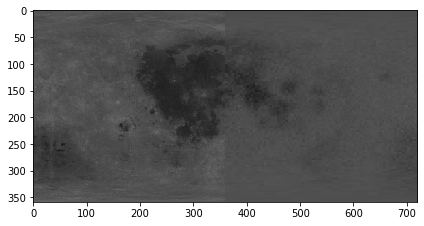

In [ ]:
y_pred_plot=y_pred.reshape(359,-1)
y_test_plot=y_test.reshape(359,-1)
'''
  Comparing Albedo prediction to the Albedo map.
'''

# seeing the entire predicted Albedo map:
print(imshow(np.concatenate((Label[:,:360],y_pred_plot), axis=1)))
print("Predicted Albedo")

AxesImage(36.8,10.8;384.03x266.4)
Original albedo


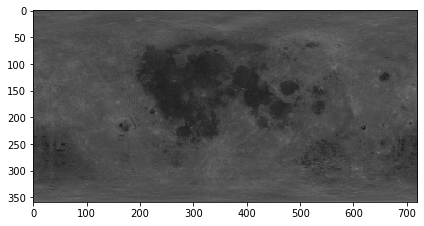

In [ ]:
# Compare with Original Albedo:
print(imshow(Label))
print("Original albedo")

# **TASK 2**


---


## Predicting Mercury’s elemental composition from Albedo with MESSENGER Data


In [ ]:
# Reading maps from csv and storing as np.arrays
alsi = pd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/alsimap_smooth_032015.png.csv').to_numpy()
casi=pd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/casimap_smooth_032015.png.csv').to_numpy()
fesi = pd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/fesimap_smooth_032015.png.csv').to_numpy()
mgsi = pd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mgsimap_smooth_032015.png.csv').to_numpy()
ssi = pd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/ssimap_smooth_032015.png.csv').to_numpy()
albedo_top = pd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mercury-albedo-top-half.png.csv').to_numpy()
albedo_bottom = pd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mercury-albedo-resized-bottom-half.png.csv').to_numpy()

'''
Features: List of np.arrays of given element ratio maps
Labels: List of np.arrays of given Albedo Map
'''

Features= [alsi,casi,fesi,mgsi,ssi]
Labels= [albedo_top,albedo_bottom]

(719, 1440)


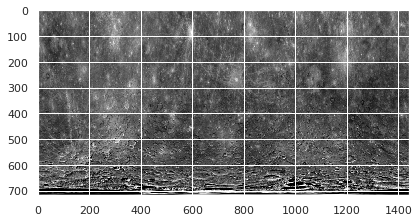

In [ ]:
# Reproducing the maps for verification's sake:
imshow(albedo_bottom)
print(albedo_bottom.shape)

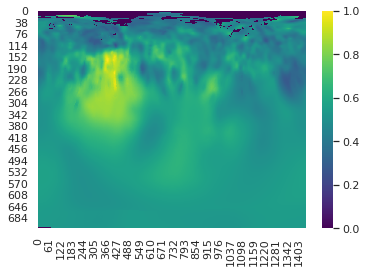

In [ ]:
import numpy as np
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(mgsi, cmap='viridis', interpretation='Nearest')

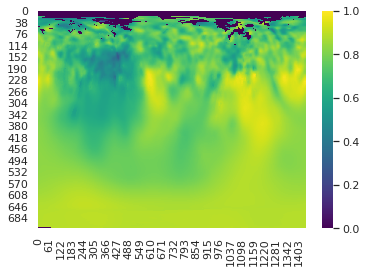

In [ ]:
ax = sns.heatmap(alsi, cmap='viridis')

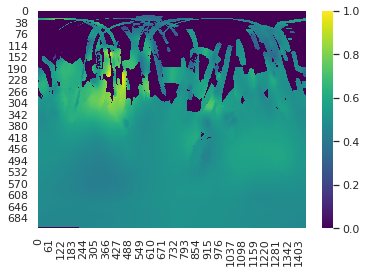

In [ ]:
ax = sns.heatmap(casi, cmap='viridis')

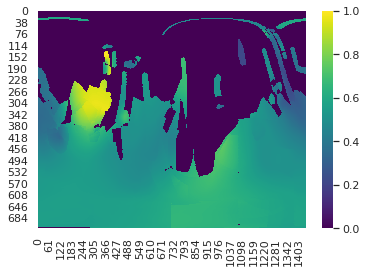

In [ ]:
ax = sns.heatmap(fesi, cmap='viridis')

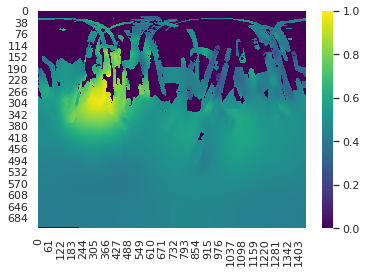

In [ ]:
ax = sns.heatmap(ssi, cmap='viridis')

In [ ]:
from skimage.transform import resize
#Resizing Albedo halves to 359x1440
albedo_top = resize(albedo_top, (albedo_top.shape[0] // 2, albedo_top.shape[1]), anti_aliasing=True)
albedo_bottom = resize(albedo_bottom, (albedo_bottom.shape[0] // 2, albedo_bottom.shape[1]), anti_aliasing=True)


In [ ]:
'''
Using Top half of the maps for training and Bottom half for testing

X_train, X_test: 
            np.arrays of Albedo Map flattened to give shape of (359x1440, 1) 
y_train, y_test: 
            np.arrays of each element ratio, flattened to give shape of (359x1440, 1) 

'''
# Making y_train and y_test for each element ratio:
y_train_alsi=np.array(alsi[:359,:].flatten()).T
y_train_casi=np.array(casi[:359,:].flatten()).T
y_train_fesi=np.array(fesi[:359,:].flatten()).T
y_train_mgsi=np.array(mgsi[:359,:].flatten()).T
y_train_ssi=np.array(ssi[:359,:].flatten()).T

y_test_alsi=np.array(alsi[359:-1,:].flatten()).T
y_test_casi=np.array(casi[359:-1,:].flatten()).T
y_test_fesi=np.array(fesi[359:-1,:].flatten()).T
y_test_mgsi=np.array(mgsi[359:-1,:].flatten()).T
y_test_ssi=np.array(ssi[359:-1,:].flatten()).T
print(y_train_fesi.shape,y_test_fesi.shape)
# X_final_test=np.stack((alsi.flatten(),casi.flatten(),fesi.flatten(),mgsi.flatten(),ssi.flatten())).T

# Making X_train and X_test from Albedo Maps:
X_train=np.array([albedo_top.flatten()]).T
X_test=np.array([albedo_bottom.flatten()]).T
# y_final_test=np.array(Labels[1].flatten()).T
print(X_train.shape,X_test.shape)


(516960,) (516960,)
(516960, 1) (516960, 1)


## Going with **Sklearn's Ensemble Methods** for the Regression Task at hand:


---



---



In [ ]:
'''
Fitting,Prediction and applying Metric: 
          Using sklearn's Ensemble methods: The GradientBoostingRegressor model      
          Using Mean Square Error as the metric for this task.

    Use custom function Predict() to get predictions for each element-ratio
'''
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

def Predict(y_train,y_test,element):
  est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42, loss='ls').fit(X_train, y_train)
  y_pred=est.predict(X_test)

  # printing MSE
  mse=mean_squared_error(y_test, y_pred)
  print("MSE for %s using GradientBoostingRegressor:"%element, mse)
  return y_pred

y_pred_alsi=Predict(y_train_alsi,y_test_alsi,"Al-Si")
y_pred_fesi=Predict(y_train_fesi,y_test_fesi,"Fe-Si")
y_pred_mgsi=Predict(y_train_mgsi,y_test_fesi,"Mg-Si")
y_pred_casi=Predict(y_train_casi,y_test_fesi,"Ca-Si")
y_pred_ssi=Predict(y_train_ssi,y_test_fesi,"S-Si")




MSE for Al-Si using GradientBoostingRegressor: 0.07126923898360178
MSE for Fe-Si using GradientBoostingRegressor: 0.18586309297493162
MSE for Mg-Si using GradientBoostingRegressor: 0.04652040413131649
MSE for Ca-Si using GradientBoostingRegressor: 0.0857558238630739
MSE for S-Si using GradientBoostingRegressor: 0.09396637079498248


## Metrics for given Element Ratios:


---



1.   MSE for **Al-Si:** 0.07126923898360178
2.   MSE for **Fe-Si**: 0.18586309297493162
1.   MSE for **Mg-Si**: 0.04652040413131649
2.   MSE for **Ca-Si**: 0.0857558238630739
1.   MSE for **S-Si**: 0.09396637079498248


## Showing Comparisions of the Element_Ratio Maps:

---



AxesSubplot(0.125,0.125;0.62x0.755)


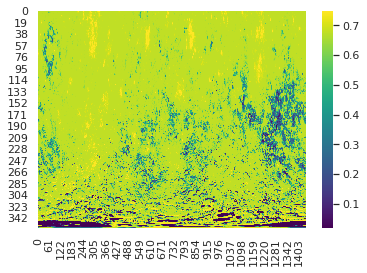

In [ ]:
y_pred_plot_al= y_pred_alsi.reshape(359,-1)
y_test_plot_al=y_test_alsi.reshape(359,-1)
'''
  Comparing element-ratio predictions for Al-Si
'''

# Predicted Composition
print(sns.heatmap(y_pred_plot_al,cmap='viridis'))

AxesSubplot(0.125,0.125;0.62x0.755)


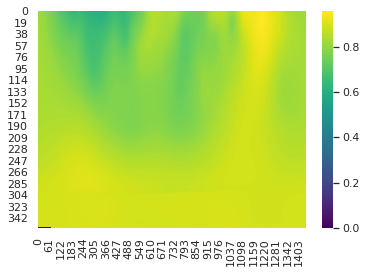

In [ ]:
# Actual Map
print(sns.heatmap(y_test_plot_al, cmap='viridis'))

AxesSubplot(0.125,0.125;0.62x0.755)


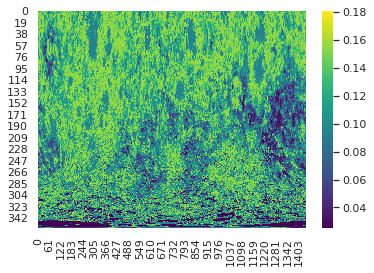

In [ ]:
y_pred_plot_fe= y_pred_fesi.reshape(359,-1)
y_test_plot_fe=y_test_fesi.reshape(359,-1)
'''
  Comparing element-ratio predictions for Fe-Si
'''

# Predicted Composition
print(sns.heatmap(y_pred_plot_fe,cmap='viridis'))


AxesSubplot(0.125,0.125;0.62x0.755)


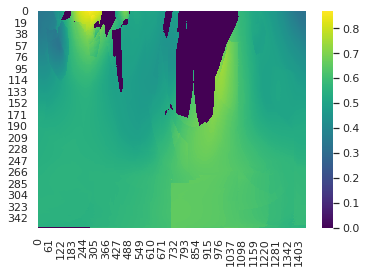

In [ ]:
# Actual Map
print(sns.heatmap(y_test_plot_fe, cmap='viridis'))

AxesSubplot(0.125,0.125;0.62x0.755)


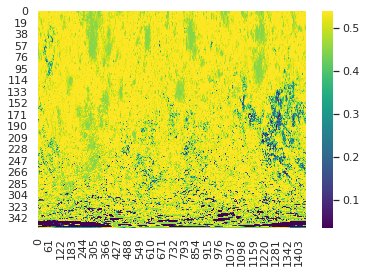

In [ ]:
y_pred_plot_mg= y_pred_mgsi.reshape(359,-1)
y_test_plot_mg=y_test_mgsi.reshape(359,-1)
'''
  Comparing element-ratio predictions for Mg-Si
'''

# Predicted Composition
print(sns.heatmap(y_pred_plot_mg,cmap='viridis'))

AxesSubplot(0.125,0.125;0.62x0.755)


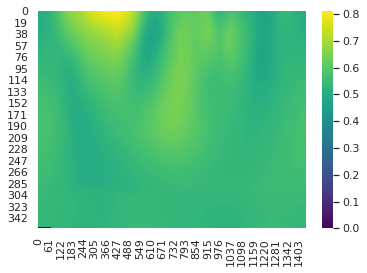

In [ ]:
# Actual Map
print(sns.heatmap(y_test_plot_mg, cmap='viridis'))

AxesSubplot(0.125,0.125;0.62x0.755)


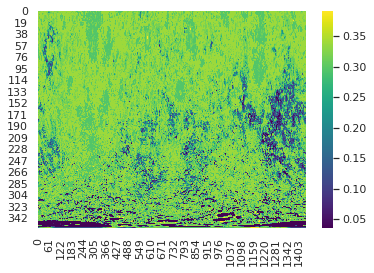

In [ ]:
y_pred_plot_ca= y_pred_casi.reshape(359,-1)
y_test_plot_ca=y_test_casi.reshape(359,-1)
'''
  Comparing element-ratio predictions for Fe-Si
'''

# Predicted Composition
print(sns.heatmap(y_pred_plot_ca,cmap='viridis'))


AxesSubplot(0.125,0.125;0.62x0.755)


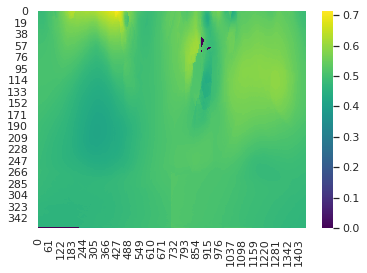

In [ ]:
# Actual Map
print(sns.heatmap(y_test_plot_ca, cmap='viridis'))

AxesSubplot(0.125,0.125;0.62x0.755)


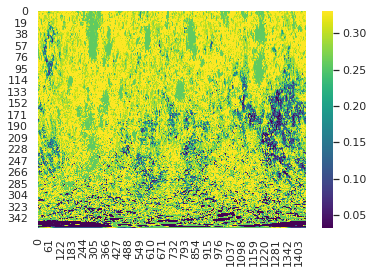

In [ ]:
y_pred_plot_s= y_pred_ssi.reshape(359,-1)
y_test_plot_s=y_test_ssi.reshape(359,-1)
'''
  Comparing element-ratio predictions for Fe-Si
'''

# Predicted Composition
print(sns.heatmap(y_pred_plot_s,cmap='viridis'))


AxesSubplot(0.125,0.125;0.62x0.755)


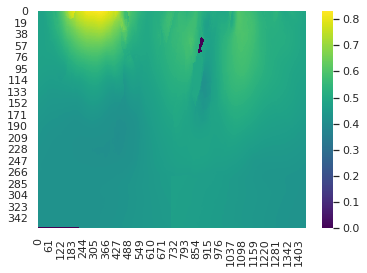

In [ ]:
# Actual Map
print(sns.heatmap(y_test_plot_s, cmap='viridis'))